<html>
    <body>
        <h4>
            <div class="alert alert-block alert-info">
            Kiran Ponappan Sreekumari  <br><br>
            CSC580 – Applying Machine Learning and Neural Networks - Capstone  <br><br>
            Colorado State University - Global  <br><br>
            Dr. Pubali Banerjee  <br><br>
            April 23, 2024  <br><br>
            Module 2: Critical Thinking Assignment - Option #1: Classifying Handwritten Digits  <br><br>
            </div>
        </h4>
    </body>
</html>


### Import libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
tf.__version__

'2.11.0'

In [62]:
import gc
gc.collect()

0

### Load data 

In [3]:

# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the input data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


### Visualize data

In [4]:
# Function to display a sample
def display_sample(x, y, num):
    label = y[num].argmax(axis=0)
    image = x[num].reshape([28,28])
    plt.title(f'Sample: {num}  Label: {label}')
    plt.imshow(image, cmap='gray_r')
    plt.show()

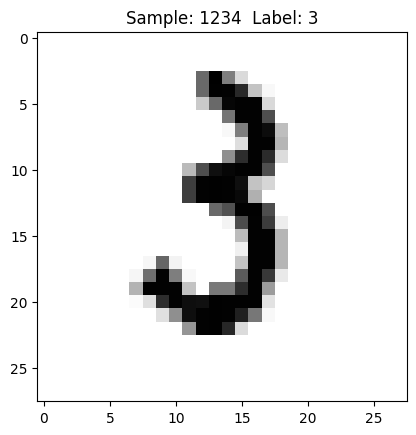

In [5]:
# Display an example
display_sample(x_train, y_train, 1234)

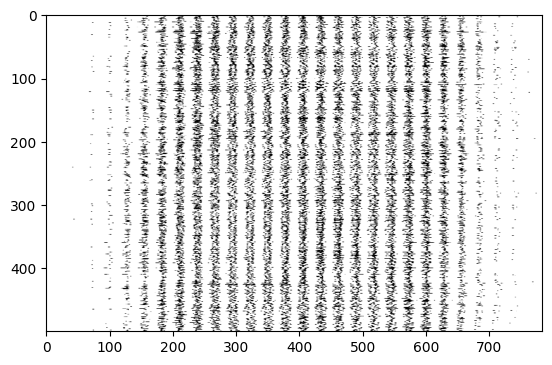

In [77]:
# Visualize multiple samples
images = np.vstack([x_train[i].reshape([1,28,28]) for i in range(500)])
plt.imshow(images.reshape(500,784), cmap='gray_r')
plt.show()

### Define Model
  1. Flatten Layer
  2. Dense layer with 512 nodes. Apply ReLU activation function
  3. Dense layer with 10 nodes [for 10 labels]. Apply softmax activation function

In [6]:
# Define the model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])

### Compile Model
   1. Optimizer = Stochastic Gradient Descent
   2. Learning Rate = 0.5
   2. Loss = Categorical Cross Entropy for multiclass
   

In [7]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate = 0.5), loss='categorical_crossentropy', metrics=['accuracy'])

### Train Model

In [8]:
# Train the model
model.fit(x_train, y_train, epochs=20, batch_size=100)

Epoch 1/20
600/600 [==============================] - 2s 3ms/step - loss: 0.2573 - accuracy: 0.9218
Epoch 2/20
600/600 [==============================] - 2s 3ms/step - loss: 0.1019 - accuracy: 0.9700
Epoch 3/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0682 - accuracy: 0.9796
Epoch 4/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0520 - accuracy: 0.9852
Epoch 5/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0395 - accuracy: 0.9882
Epoch 6/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0308 - accuracy: 0.9912
Epoch 7/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0239 - accuracy: 0.9941
Epoch 8/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0183 - accuracy: 0.9958
Epoch 9/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0145 - accuracy: 0.9969
Epoch 10/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0109 - accuracy: 0.9985

### Evaluate Model

In [9]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {accuracy}")

313/313 [==============================] - 0s 1ms/step - loss: 0.0585 - accuracy: 0.9826
Test accuracy: 0.9825999736785889


In [37]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_14 (Flatten)        (None, 784)               0         
                                                                 
 dense_28 (Dense)            (None, 512)               401920    
                                                                 
 dense_29 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [61]:
def build_model(neurons = 512, learning_rate = 0.5, batch_size = 100):
    # Define the model
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(neurons, activation='relu'),
        Dense(10, activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate = learning_rate), loss='categorical_crossentropy', 
                  metrics=['accuracy'])

    # Train the model
    model.fit(x_train, y_train, epochs=20, batch_size=100)

    # Evaluate the model
    loss, accuracy = model.evaluate(x_test, y_test)
    
    return model, accuracy

<div class="alert alert-block alert-success">
<h2>1. What is the accuracy of the model? </h2>
       <h4>Accuracy = 98.26 %</h4>

### Function for Confusion Matrix

In [10]:
def display_confusion_matrix(model, x_test, y_test):
    # Predict the labels for the test set
    y_pred = model.predict(x_test)
    
    # Convert predicted probabilities to one-hot encoded labels
    y_pred_labels = np.argmax(y_pred, axis=1)
    
    # Convert true labels from one-hot encoding to integers
    y_true_labels = np.argmax(y_test, axis=1)
    
    # Compute the confusion matrix
    cm = tf.math.confusion_matrix(y_true_labels, y_pred_labels)
    
    # Convert tensor to numpy array for easier manipulation with seaborn
    cm_np = cm.numpy()
    
    # Create a heatmap using seaborn
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm_np, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=np.arange(10), yticklabels=np.arange(10))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

313/313 [==============================] - 0s 936us/step


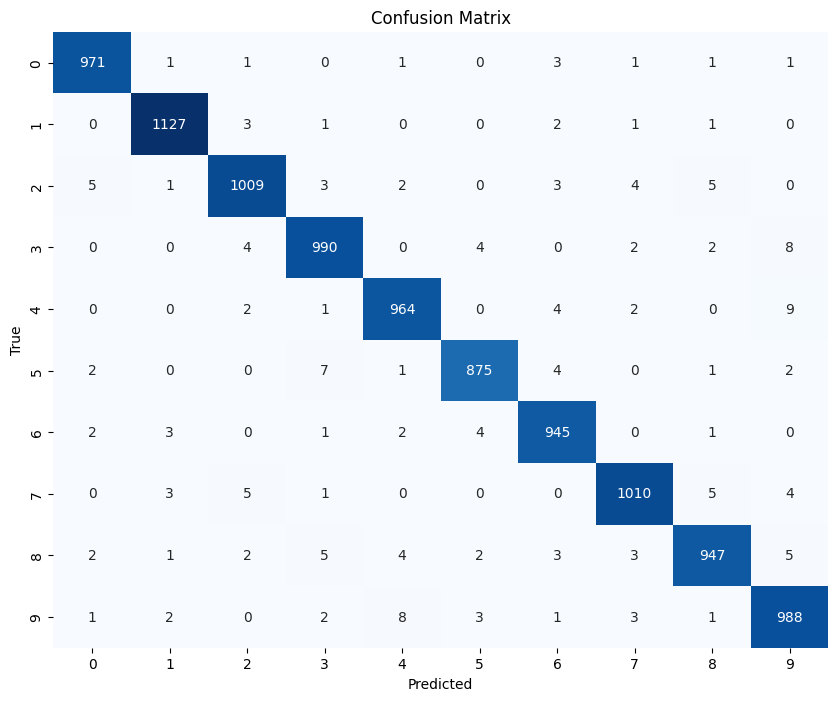

In [11]:
# Usage example, assuming the model and test data are defined as per the previous example:
display_confusion_matrix(model, x_test, y_test)

### Misclassified Images

In [13]:
def misclassified_image_list():
    y_pred = model.predict(x_test)
    y_pred_labels = np.argmax(y_pred, axis=1)
    y_test_labels = np.where(y_test == 1.0)[1]
    mismatch = []
    for i in range(len(y_test_labels)):
        if y_pred_labels[i] != y_test_labels[i]:
            mismatch.append(i)
    
    return mismatch
    

<div class="alert alert-block alert-success">
<h2>2. What are some of the misclassified images?</h2>

In [38]:
misclassified_images = misclassified_image_list()
print(f"Number of misclassified images : {len(misclassified_images)}")
print(f"Percentage of classified images : {(len(y_test)-len(misclassified_images))/len(y_test)*100} %")

313/313 [==============================] - 0s 1ms/step
Number of misclassified images : 160
Percentage of classified images : 98.4 %


In [40]:
#List misclassified images
misclassified_images

[149,
 247,
 321,
 340,
 381,
 445,
 449,
 495,
 582,
 619,
 659,
 684,
 720,
 900,
 947,
 951,
 956,
 965,
 1014,
 1039,
 1112,
 1156,
 1224,
 1226,
 1232,
 1242,
 1247,
 1299,
 1319,
 1328,
 1393,
 1395,
 1414,
 1494,
 1522,
 1530,
 1549,
 1609,
 1621,
 1681,
 1790,
 1901,
 1941,
 1982,
 1984,
 2053,
 2070,
 2098,
 2118,
 2130,
 2135,
 2182,
 2272,
 2293,
 2369,
 2387,
 2406,
 2414,
 2488,
 2597,
 2607,
 2648,
 2654,
 2720,
 2877,
 2896,
 2921,
 2927,
 2939,
 2953,
 3073,
 3117,
 3289,
 3405,
 3422,
 3503,
 3520,
 3533,
 3558,
 3559,
 3567,
 3597,
 3681,
 3780,
 3796,
 3808,
 3869,
 3906,
 3926,
 3941,
 3985,
 4065,
 4078,
 4176,
 4199,
 4201,
 4248,
 4289,
 4425,
 4497,
 4536,
 4731,
 4740,
 4761,
 4807,
 4814,
 4823,
 4860,
 4876,
 4879,
 4880,
 4956,
 5331,
 5457,
 5642,
 5734,
 5757,
 5936,
 5937,
 5955,
 5972,
 5973,
 5997,
 6011,
 6023,
 6024,
 6059,
 6555,
 6571,
 6597,
 6625,
 6783,
 6847,
 7216,
 7434,
 8062,
 8094,
 8246,
 8311,
 8325,
 8408,
 8522,
 8527,
 9009,
 9015,
 90

### Check misclassified images (predicted) with actual images (y_test)

1/1 [==============================] - 0s 29ms/step
Predicted Label : [7]
Actual Label : [2]


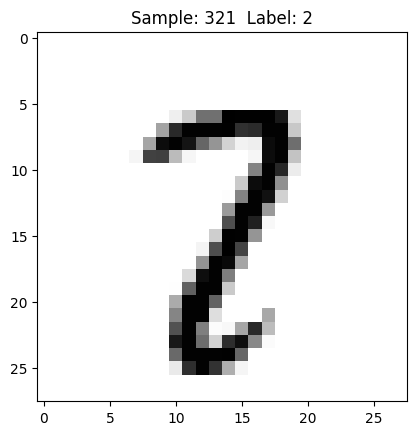

In [43]:
num = 321
y_pred = model.predict(x_test[num])
y_pred_labels = np.argmax(y_pred, axis=1)
# y_true_labels = np.argmax(y_test[0], axis=1)

print(f"Predicted Label : {y_pred_labels}")
print(f"Actual Label : {np.where(y_test[num] == 1.0)[0]}")

display_sample(x_test, y_test, num)


<div class="alert alert-block alert-success">
<h2>3. How is the accuracy affected by using more hidden neurons? Fewer hidden neurons?</h2>

### Run the model for multiple hidden neurons [128,256,512,1024]

In [19]:
hidden_neurons = [128,256,512,1024]
result_1 = []
for neurons in hidden_neurons:
    model, accuracy = build_model(neurons=neurons)
    result_1.append((neurons, accuracy))
    
np_result_1 = np.array(result_1)
    

Epoch 1/20
600/600 [==============================] - 1s 2ms/step - loss: 0.2777 - accuracy: 0.9169
Epoch 2/20
600/600 [==============================] - 1s 1ms/step - loss: 0.1148 - accuracy: 0.9652
Epoch 3/20
600/600 [==============================] - 1s 1ms/step - loss: 0.0824 - accuracy: 0.9756
Epoch 4/20
600/600 [==============================] - 1s 1ms/step - loss: 0.0639 - accuracy: 0.9809
Epoch 5/20
600/600 [==============================] - 1s 1ms/step - loss: 0.0523 - accuracy: 0.9840
Epoch 6/20
600/600 [==============================] - 1s 1ms/step - loss: 0.0425 - accuracy: 0.9872
Epoch 7/20
600/600 [==============================] - 1s 1ms/step - loss: 0.0346 - accuracy: 0.9900
Epoch 8/20
600/600 [==============================] - 1s 1ms/step - loss: 0.0291 - accuracy: 0.9917
Epoch 9/20
600/600 [==============================] - 1s 1ms/step - loss: 0.0247 - accuracy: 0.9930
Epoch 10/20
600/600 [==============================] - 1s 1ms/step - loss: 0.0203 - accuracy: 0.9949

600/600 [==============================] - 4s 6ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 20/20
313/313 [==============================] - 1s 3ms/step - loss: 0.0547 - accuracy: 0.9846


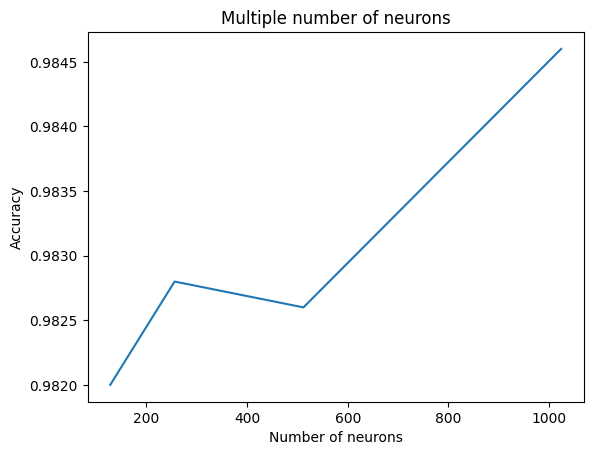

In [31]:
x = np_result_1[:,0]
y = np_result_1[:,1]
plt.title("Multiple number of neurons") 
plt.xlabel("Number of neurons") 
plt.ylabel("Accuracy") 
plt.plot(x,y) 
plt.show()

In [27]:
np_result_1

array([[1.28000000e+02, 9.81999993e-01],
       [2.56000000e+02, 9.82800007e-01],
       [5.12000000e+02, 9.82599974e-01],
       [1.02400000e+03, 9.84600008e-01]])

<div class="alert alert-block alert-success">
<h2>4. How is the accuracy affected by using different learning rates? Try a range of at least four values.</h2>

### Run model for multiple learning rates [0.2,0.3,0.4,0.5,0.6]

In [36]:
learning_rates = [0.2,0.3,0.4,0.5,0.6]
result_2 = []
for lr in learning_rates:
    model, accuracy = build_model(learning_rate=lr)
    result_2.append((lr, accuracy))
    
np_result_2 = np.array(result_2)

Epoch 1/20
600/600 [==============================] - 2s 4ms/step - loss: 0.3298 - accuracy: 0.9064
Epoch 2/20
600/600 [==============================] - 2s 3ms/step - loss: 0.1624 - accuracy: 0.9539
Epoch 3/20
600/600 [==============================] - 2s 3ms/step - loss: 0.1159 - accuracy: 0.9675
Epoch 4/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0907 - accuracy: 0.9741
Epoch 5/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0735 - accuracy: 0.9791
Epoch 6/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0619 - accuracy: 0.9833
Epoch 7/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0526 - accuracy: 0.9857
Epoch 8/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0453 - accuracy: 0.9880
Epoch 9/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0391 - accuracy: 0.9899
Epoch 10/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0346 - accuracy: 0.9916

600/600 [==============================] - 2s 4ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 20/20
313/313 [==============================] - 1s 2ms/step - loss: 0.0591 - accuracy: 0.9826
Epoch 1/20
600/600 [==============================] - 3s 4ms/step - loss: 0.2428 - accuracy: 0.9265
Epoch 2/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0947 - accuracy: 0.9717
Epoch 3/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0634 - accuracy: 0.9813
Epoch 4/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0472 - accuracy: 0.9859
Epoch 5/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0349 - accuracy: 0.9898
Epoch 6/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0262 - accuracy: 0.9926
Epoch 7/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0188 - accuracy: 0.9952
Epoch 8/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0139 - accuracy: 0.9968
Epoch 9/20

In [45]:
np_result_2

array([[0.2       , 0.98119998],
       [0.3       , 0.98280001],
       [0.4       , 0.98329997],
       [0.5       , 0.98259997],
       [0.6       , 0.98400003]])

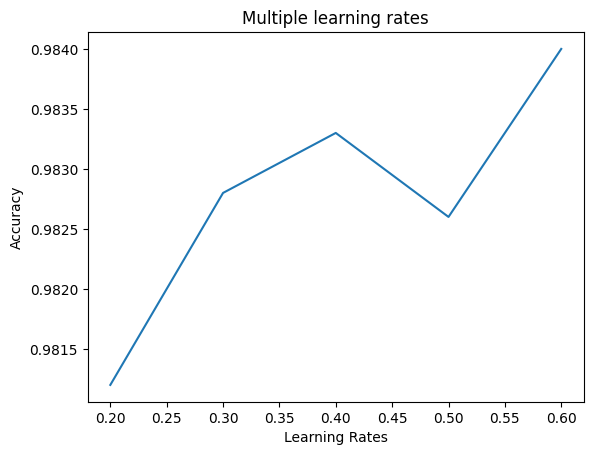

In [44]:
x = np_result_2[:,0]
y = np_result_2[:,1]
plt.title("Multiple learning rates") 
plt.xlabel("Learning Rates") 
plt.ylabel("Accuracy") 
plt.plot(x,y) 
plt.show()

<div class="alert alert-block alert-success">
<h2>5. How is accuracy affected by adding another hidden layer?</h2>

In [52]:
def build_model2(neurons = 512, learning_rate = 0.5, batch_size = 100):
    # Define the model
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(neurons, activation='relu'),
        Dense(256, activation='relu'),
        Dense(10, activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate = learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(x_train, y_train, epochs=20, batch_size=100)

    # Evaluate the model
    loss, accuracy = model.evaluate(x_test, y_test)
    
    return model, accuracy

In [50]:
model2, accuracy2 = build_model2()


Epoch 1/20
600/600 [==============================] - 3s 4ms/step - loss: 0.2626 - accuracy: 0.9172
Epoch 2/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0899 - accuracy: 0.9720
Epoch 3/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0580 - accuracy: 0.9819
Epoch 4/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0411 - accuracy: 0.9872
Epoch 5/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0286 - accuracy: 0.9914
Epoch 6/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0201 - accuracy: 0.9938
Epoch 7/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0126 - accuracy: 0.9963
Epoch 8/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0086 - accuracy: 0.9977
Epoch 9/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0060 - accuracy: 0.9984
Epoch 10/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0046 - accuracy: 0.9989

In [56]:
print(f"Test accuracy: {accuracy2}")

Test accuracy: 0.9847999811172485


In [51]:
model2.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_19 (Flatten)        (None, 784)               0         
                                                                 
 dense_38 (Dense)            (None, 512)               401920    
                                                                 
 dense_39 (Dense)            (None, 256)               131328    
                                                                 
 dense_40 (Dense)            (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


<div class="alert alert-block alert-success">
<h2>6. How is accuracy affected by using different batch sizes? Try at least three different batch sizes.</h2>

### Build model for multiple batch sizes [50, 100, 150, 200]

In [47]:
batch_sizes = [50, 100, 150, 200]
result_3 = []
for bs in batch_sizes:
    model, accuracy = build_model(batch_size=bs)
    result_3.append((bs, accuracy))
    
np_result_3 = np.array(result_3)

Epoch 1/20
600/600 [==============================] - 2s 4ms/step - loss: 0.2515 - accuracy: 0.9245
Epoch 2/20
600/600 [==============================] - 2s 4ms/step - loss: 0.1019 - accuracy: 0.9704
Epoch 3/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0686 - accuracy: 0.9803
Epoch 4/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0509 - accuracy: 0.9850
Epoch 5/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0393 - accuracy: 0.9889
Epoch 6/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0303 - accuracy: 0.9913
Epoch 7/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0233 - accuracy: 0.9938
Epoch 8/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0176 - accuracy: 0.9961
Epoch 9/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0141 - accuracy: 0.9972
Epoch 10/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0109 - accuracy: 0.9984

600/600 [==============================] - 3s 5ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 20/20
313/313 [==============================] - 1s 2ms/step - loss: 0.0569 - accuracy: 0.9835


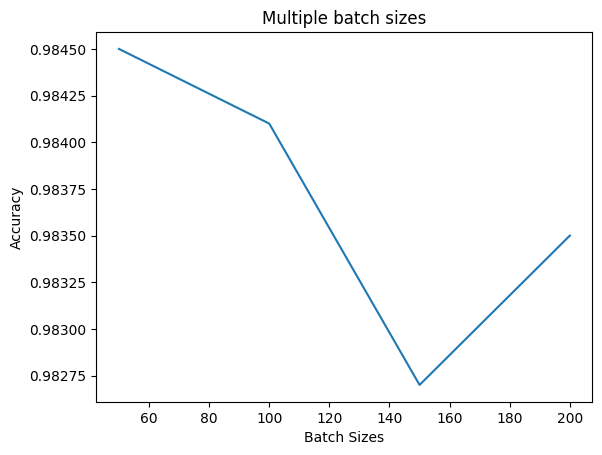

In [48]:
x = np_result_3[:,0]
y = np_result_3[:,1]
plt.title("Multiple batch sizes") 
plt.xlabel("Batch Sizes") 
plt.ylabel("Accuracy") 
plt.plot(x,y) 
plt.show()

<div class="alert alert-block alert-success">
<h2>7. What is the best accuracy you can get from this multi-layer perceptron?</h2>

In [55]:
model3, accurracy3 = build_model2(learning_rate=0.6, batch_size=50, neurons=1024 )

Epoch 1/20
600/600 [==============================] - 4s 6ms/step - loss: 0.2803 - accuracy: 0.9138
Epoch 2/20
600/600 [==============================] - 3s 6ms/step - loss: 0.0838 - accuracy: 0.9740
Epoch 3/20
600/600 [==============================] - 3s 6ms/step - loss: 0.0544 - accuracy: 0.9836
Epoch 4/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0336 - accuracy: 0.9895
Epoch 5/20
600/600 [==============================] - 4s 6ms/step - loss: 0.0258 - accuracy: 0.9918
Epoch 6/20
600/600 [==============================] - 4s 6ms/step - loss: 0.0161 - accuracy: 0.9951
Epoch 7/20
600/600 [==============================] - 4s 6ms/step - loss: 0.0128 - accuracy: 0.9961
Epoch 8/20
600/600 [==============================] - 4s 6ms/step - loss: 0.0075 - accuracy: 0.9980
Epoch 9/20
600/600 [==============================] - 4s 6ms/step - loss: 0.0054 - accuracy: 0.9987
Epoch 10/20
600/600 [==============================] - 4s 6ms/step - loss: 0.0026 - accuracy: 0.9995

In [58]:
print(f"Test accuracy: {accurracy3}")

Test accuracy: 0.9855999946594238


In [59]:
model3.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_21 (Flatten)        (None, 784)               0         
                                                                 
 dense_44 (Dense)            (None, 1024)              803840    
                                                                 
 dense_45 (Dense)            (None, 256)               262400    
                                                                 
 dense_46 (Dense)            (None, 10)                2570      
                                                                 
Total params: 1,068,810
Trainable params: 1,068,810
Non-trainable params: 0
_________________________________________________________________
